In [1]:
import sqlite3
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
db_conn = sqlite3.connect("articles.db")
cursor = db_conn.cursor()

In [3]:
#Posts.PostID, Articles.Content
posts = cursor.execute("SELECT PostID, Content FROM Posts "
                       "JOIN Articles ON Posts.ArticleID=Articles.ArticleID "
                       "WHERE Posts.SocialMediaID=1 AND LENGTH(Articles.Content) > 450").fetchall()

post_ids = [post_id for (post_id, contents) in posts]
article_contents = [contents for (post_id, contents) in posts]

In [4]:
data = {
    "wow": [],
    "haha": [],
    "like": [],
    "sad": [],
    "care": [],
    "angry": [],
    "love": []
}

for post in post_ids:
    raw_reactions = cursor.execute("SELECT IFNULL(Value, 0) FROM PostDatatypes "
                        "LEFT JOIN PostDetails on PostDetails.TypeID=PostDatatypes.TypeID "
                        "AND PostID=?", (post,)).fetchall()[7:14]

    raw_reactions = [int(value[0]) for value in raw_reactions]

    #reactions = list(map(lambda x: x/sum(raw_reactions), raw_reactions))

    data["wow"].append(raw_reactions[0])
    data["haha"].append(raw_reactions[1])
    data["like"].append(raw_reactions[2])
    data["sad"].append(raw_reactions[3])
    data["care"].append(raw_reactions[4])
    data["angry"].append(raw_reactions[5])
    data["love"].append(raw_reactions[6])

reactions = pd.DataFrame(data)

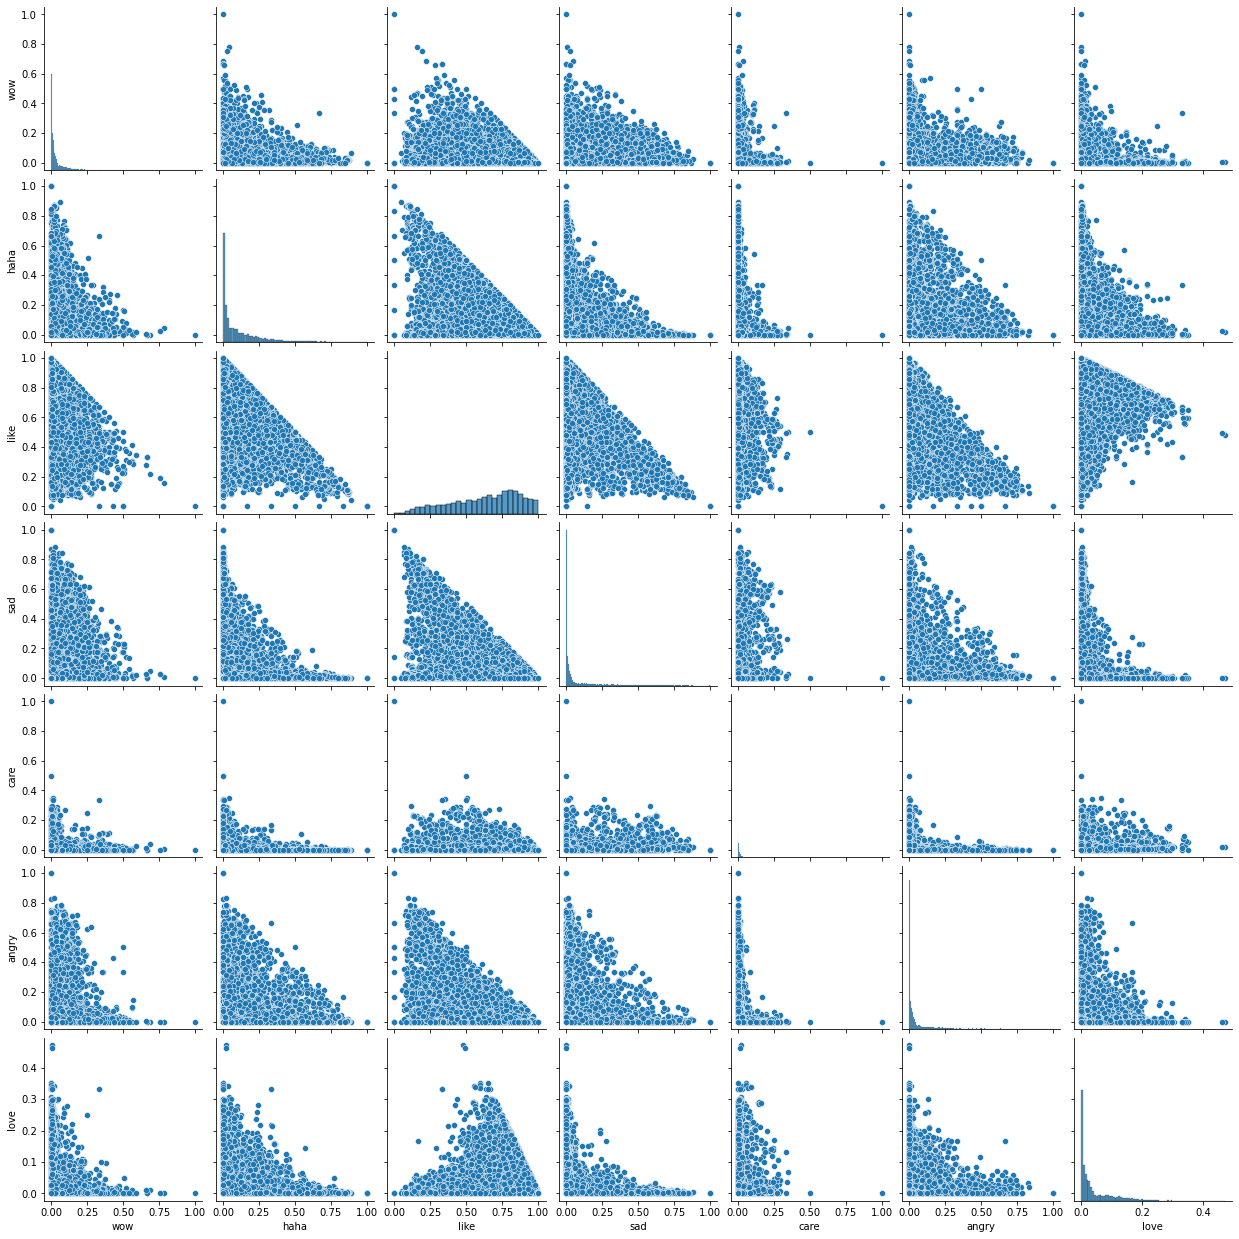

In [8]:
sns.pairplot(reactions)

<AxesSubplot:>

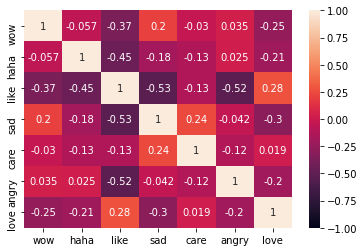

In [7]:
sns.heatmap(reactions.corr(), vmin=-1, vmax=1, annot=True)